In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset/total_preprocessed.csv')

In [4]:
df_x = df.drop(['Attack Name'], axis=1)
df_y = df['Attack Name']

In [5]:
df.columns

Index(['Total Length of Bwd Packet', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Min',
       'Bwd IAT Std', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Packets/s',
       'Packet Length Min', 'SYN Flag Count', 'PSH Flag Count',
       'Down/Up Ratio', 'Fwd Segment Size Avg', 'Bwd Bulk Rate Avg',
       'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'FWD Init Win Bytes',
       'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
       'Active Std', 'Active Max', 'Idle Std', 'Attack Name',
       'Fwd PSH Flags_0', 'Fwd PSH Flags_1', 'FIN Flag Count_0',
       'FIN Flag Count_1', 'FIN Flag Count_2', 'FIN Flag Count_3',
       'RST Flag Count_0', 'RST Flag Count_1', 'RST Flag Count_2',
       'URG Flag Count_0', 'URG Flag Count_1', 'URG Flag Count_2',
       'ECE Flag Count_0', 'ECE Flag Count_1', 'ECE Flag Count_2'

In [6]:
# scaling 적용 후 randomforest 이용해 feature importance 확인
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
scaler.fit(df_x)
df_x_scaled = scaler.transform(df_x)


In [7]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(df_x_scaled, df_y)


RandomForestClassifier()

In [8]:
# featrue importance 확인
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

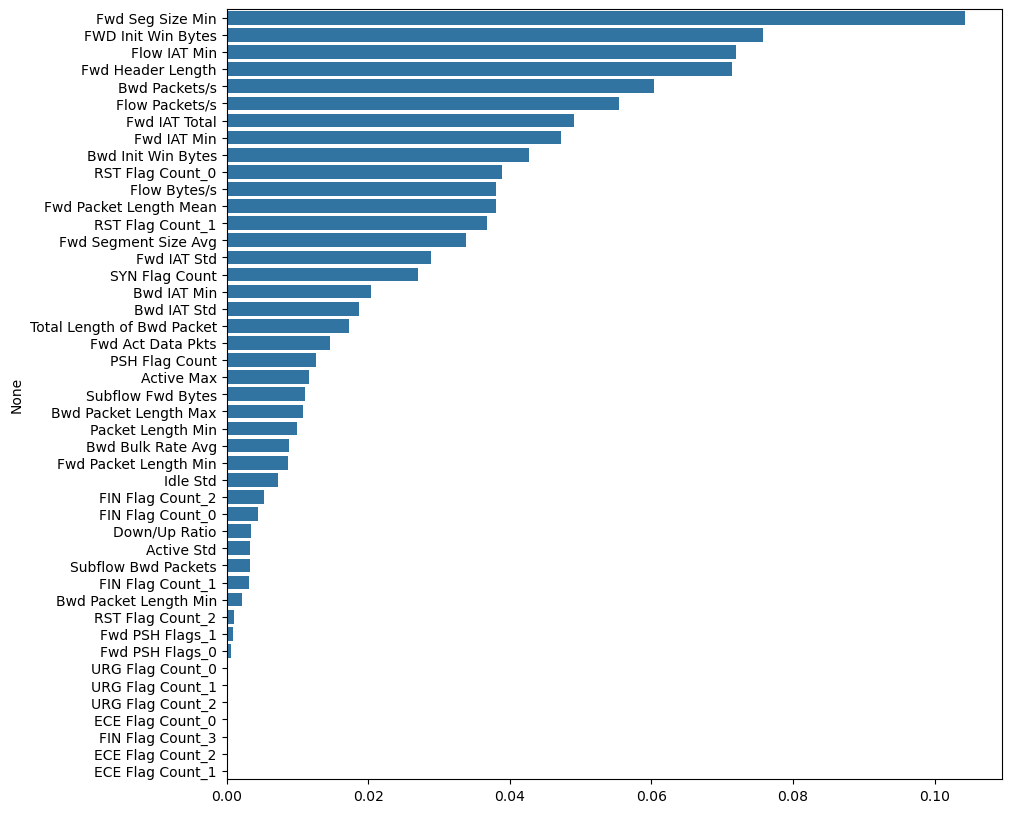

In [9]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.barplot(x=importances[indices], y=df_x.columns[indices])
plt.show()

In [10]:
# 파생변수 생성. 파생변수를 생성 후 feature importance 다시확인.
df['bwd/flow'] = df['Bwd Packets/s'] / (df['Flow Packets/s']+1e-5)# backward의 비율을 나타내는 파생변수 생성
df['header_overhead'] = df['Fwd Header Length'] / (df['Fwd Segment Size Avg']+1e-5) # 패킷의 헤더와 데이터 전체 크기의 비율
df['flow_speed'] = df['Flow Packets/s'] / (df['Flow Bytes/s']+1e-5) # flow의 속도를 나타내는 파생변수 생성


In [11]:
#inf 값이 있는 행 제거
df = df.replace([np.inf, -np.inf], np.nan)

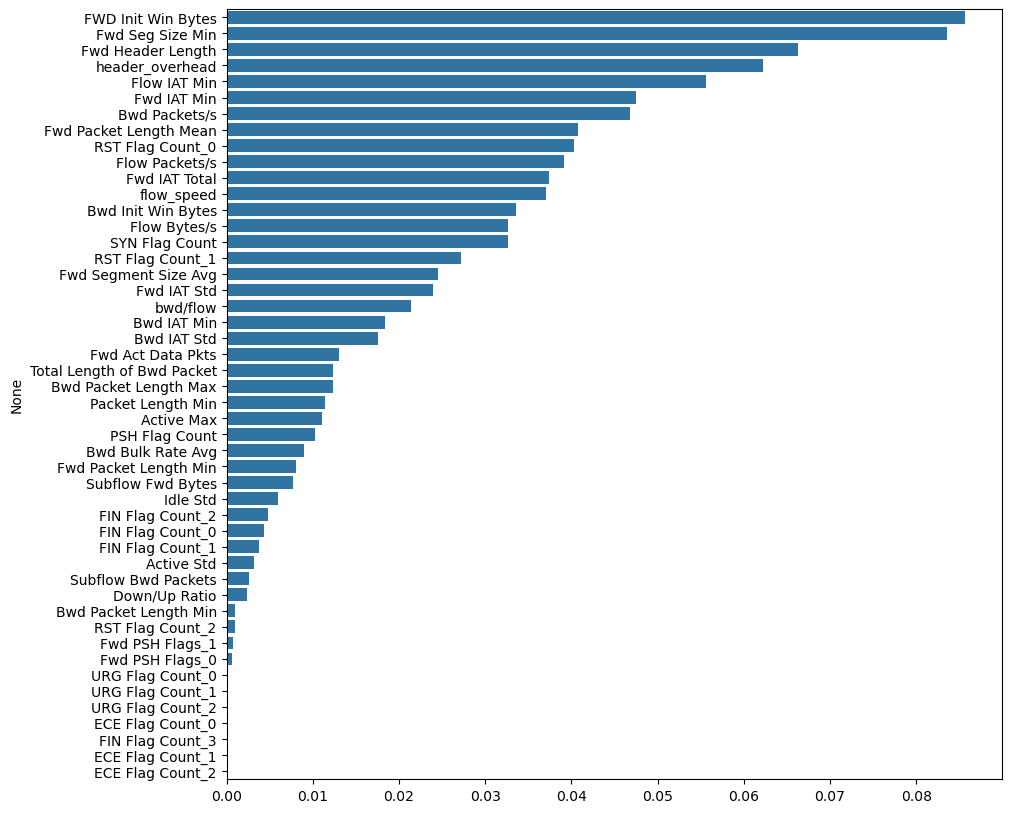

In [12]:
# scaling 적용 후 randomforest 이용해 feature importance 확인
df_x = df.drop(['Attack Name'], axis=1)
df_y = df['Attack Name']

scaler = StandardScaler()
scaler.fit(df_x)
df_x_scaled = scaler.transform(df_x)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(df_x_scaled, df_y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 10))
sns.barplot(x=importances[indices], y=df_x.columns[indices])
plt.show()

In [13]:
df.to_csv('dataset/total_preprocessed_featureselected.csv', index=False)